In [90]:
from sklearn.datasets import load_wine

# Load dataset
wine_data = load_wine()

# Feature datas and labels
X = wine_data.data  # Features (13 chemical features)
y = wine_data.target  # Labels (3 kinds of wine)

# Description of data
# print(wine_data.DESCR)
len(X), len(y)

(178, 178)

In [91]:
import pandas as pd

wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine['wine_type'] = wine_data.target
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [92]:
wine.shape

(178, 14)

In [93]:
# Missing
wine.isna().sum(axis=0)

# Duplication
wine.duplicated().sum()

0

In [94]:
TRAIN_RATE = 0.6
VAL_RATE = 0.8

idx_train = int(len(wine) * TRAIN_RATE)
idx_val = int(len(wine)* VAL_RATE)
idx_train, idx_val

(106, 142)

In [120]:
train = wine.iloc[:idx_train, :]
val = wine.iloc[idx_train:idx_val, :]
test = wine.iloc[idx_val:, :]

train.shape, val.shape, test.shape

((106, 14), (36, 14), (36, 14))

In [119]:
X_train = train.drop('wine_type', axis=1)
y_train = train['wine_type']

X_val = val.drop('wine_type', axis=1)
y_val = val['wine_type']

y_train.value_counts(), y_val.value_counts()

(wine_type
 0    59
 1    47
 Name: count, dtype: int64,
 wine_type
 1    24
 2    12
 Name: count, dtype: int64)

In [118]:
u = X_train.mean()
std = X_train.std()

X_train_s = (X_train - u)/std
X_train_s.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.302258,-0.199833,0.309224,-0.800749,1.599623,0.428578,0.734344,-0.344575,1.023758,0.714366,-0.337659,1.961977,0.576835
1,0.063428,-0.102920,-0.696653,-2.188078,-0.123418,0.157305,0.326518,-0.530927,-0.885711,-0.074218,-0.267835,0.902675,0.533155
2,0.015318,0.700068,1.141673,0.145158,-0.059602,0.428578,0.979040,-0.158223,2.006851,0.739400,-0.407483,0.434137,0.926283
3,1.470643,0.132438,0.552021,-0.422386,0.706194,2.327493,1.318895,-0.717279,0.815796,2.066222,-1.594491,1.004531,1.785341
4,0.111538,1.018494,1.835381,0.901883,1.025276,0.428578,0.231358,0.680360,0.135193,-0.111769,-0.337659,-0.054772,-0.384145


In [117]:
X_val_s = (X_val - u)/std
X_val_s.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
106,-1.079182,-0.172144,-0.766024,0.271279,-1.399745,-1.651186,-0.665860,0.494008,-0.224014,-0.687560,-0.616955,0.434137,-1.039359
107,-0.513891,-0.144454,-0.211057,1.374837,-1.144480,-2.139478,-1.032903,1.518943,-0.224014,-0.750146,-1.454843,-1.093703,-1.103424
108,-1.115265,-0.781307,-1.390361,0.271279,-0.633949,-0.367158,-0.652266,0.680360,0.626740,-1.125662,-1.594491,0.128569,-1.615947
109,-1.848941,-0.698239,1.245729,0.586581,-0.506316,0.320069,0.544025,-0.251399,1.401871,-1.156955,-0.896251,0.617478,-0.544308
110,-2.029353,2.610626,-1.806586,0.428930,0.323296,1.115804,0.081822,-0.717279,3.462585,-1.000490,-2.362556,-0.299226,-0.887932


In [116]:
ss_dic = {'mean':u, 'std':std}
ss_dic

{'mean': alcohol                          13.147264
 malic_acid                        1.854340
 ash                               2.340849
 alcalinity_of_ash                18.139623
 magnesium                       101.933962
 total_phenols                     2.563019
 flavanoids                        2.519811
 nonflavanoid_phenols              0.316981
 proanthocyanins                   1.748491
 color_intensity                   4.498585
 hue                               1.088358
 od280/od315_of_diluted_wines      2.956887
 proline                         866.915094
 dtype: float64,
 'std': alcohol                           0.831430
 malic_acid                        0.722302
 ash                               0.288306
 alcalinity_of_ash                 3.171561
 magnesium                        15.669971
 total_phenols                     0.552947
 flavanoids                        0.735607
 nonflavanoid_phenols              0.107324
 proanthocyanins                   0.528943


In [115]:
y_unique = set(y_val.unique()).union(set(y_train.unique()))
label_dict = {specie:i  for i, specie in enumerate(y_unique)}
# label_dict = {specie:i  for i, specie in enumerate(y_val.unique())}

label_dict

{0: 0, 1: 1, 2: 2}

In [114]:
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict)

y_train_e.shape, y_val_e.shape

((106,), (36,))

In [102]:
u = X_train.mean()
std = X_train.std()

X_train_s = (X_train - u)/std
X_train_s.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.302258,-0.199833,0.309224,-0.800749,1.599623,0.428578,0.734344,-0.344575,1.023758,0.714366,-0.337659,1.961977,0.576835
1,0.063428,-0.102920,-0.696653,-2.188078,-0.123418,0.157305,0.326518,-0.530927,-0.885711,-0.074218,-0.267835,0.902675,0.533155
2,0.015318,0.700068,1.141673,0.145158,-0.059602,0.428578,0.979040,-0.158223,2.006851,0.739400,-0.407483,0.434137,0.926283
3,1.470643,0.132438,0.552021,-0.422386,0.706194,2.327493,1.318895,-0.717279,0.815796,2.066222,-1.594491,1.004531,1.785341
4,0.111538,1.018494,1.835381,0.901883,1.025276,0.428578,0.231358,0.680360,0.135193,-0.111769,-0.337659,-0.054772,-0.384145


In [113]:
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict)

y_train_e.shape, y_val_e.shape

((106,), (36,))

In [104]:
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()

X_val_s = X_val_s.to_numpy()
y_val_e = y_val_e.to_numpy()

print(X_train_s.shape, y_train_e.shape)
print(X_val_s.shape, y_val_e.shape)
print(type(X_train_s), type(y_train_e))
print(type(X_val_s), type(y_val_e))

(106, 13) (106,)
(36, 13) (36,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [105]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s, y_train_e)

y_pred = clf.predict(X_val_s)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [106]:
from sklearn.metrics import accuracy_score

scores = []
for k in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_s, y_train_e)
    y_pred = clf.predict(X_val_s)
    acc = accuracy_score(y_val_e, y_pred)
    scores.append(acc)

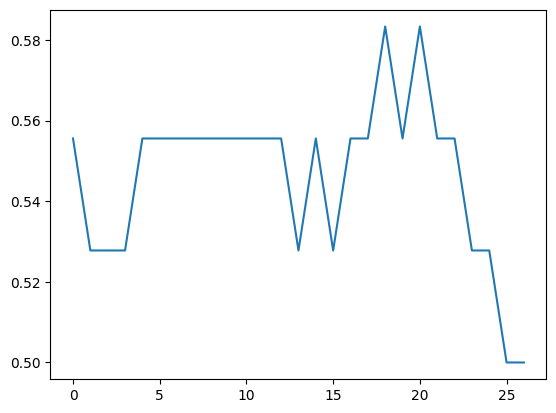

In [107]:
import matplotlib.pyplot as plt

plt.plot(scores)

In [108]:
X_test = test.drop('wine_type', axis=1)
y_test = test['wine_type']

X_test_s = (X_test - ss_dic['mean'])/ss_dic['std']
y_test_e = y_test.map(label_dict)

X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

y_pred = clf.predict(X_test_s)

In [109]:
(y_test_e == y_pred).sum()/len(y_test_e)

0.0

In [110]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test_e, y_pred)
cfm

array([[ 0,  0,  0],
       [ 0,  0,  0],
       [13, 23,  0]])

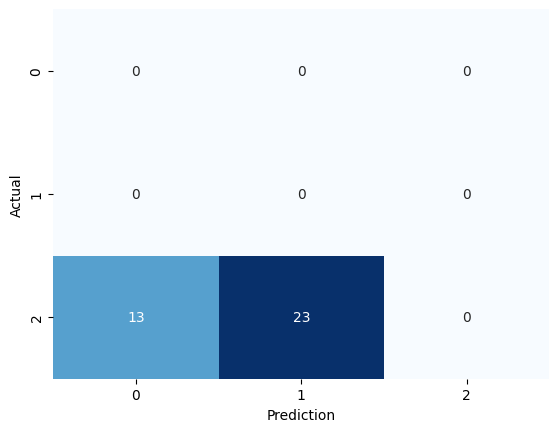

In [111]:
import seaborn as sns

s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
s.set(xlabel='Prediction', ylabel='Actual')
plt.show()

In [112]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print('accuracy:', accuracy_score(y_test_e, y_pred))
print('recall:', recall_score(y_test_e, y_pred, average='macro'))
print('precision:', precision_score(y_test_e, y_pred, average='macro'))
print('f1 :', f1_score(y_test_e, y_pred, average='macro'))

accuracy: 0.0
recall: 0.0
precision: 0.0
f1 : 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
